In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data

## Our sensor data | T2G2

In [3]:
data = pd.read_csv('/content/week14_july20.csv')
data.head()

,id,clientID,topic,message,timestamp
0,12,t2g2:114,t2g2,24.19;63.30;26;Min;,2024-07-01 14:50:48
1,13,t2g2:114,t2g2,24.22;65.32;28;Min;,2024-07-01 14:50:58
2,14,t2g2:114,t2g2,27.89;67.87;26;Min;,2024-07-01 14:51:08
3,15,t2g2:114,t2g2,26.81;55.47;26;Min;,2024-07-01 14:51:18
4,16,t2g2:114,t2g2,26.00;56.42;25;Min;,2024-07-01 14:51:28


In [4]:
data.drop(['id', 'clientID', 'topic'], axis=1, inplace=True)
data.set_index('timestamp', inplace=True)
data.head()

,message
timestamp,
2024-07-01 14:50:48,24.19;63.30;26;Min;
2024-07-01 14:50:58,24.22;65.32;28;Min;
2024-07-01 14:51:08,27.89;67.87;26;Min;
2024-07-01 14:51:18,26.81;55.47;26;Min;
2024-07-01 14:51:28,26.00;56.42;25;Min;


In [5]:
data[['temp', 'hum', 'air', 'name', 'nth']] = data['message'].str.split(';', expand=True)
data.drop(['message', 'name', 'nth'], axis=1, inplace=True)
data.head()

,temp,hum,air
timestamp,,,
2024-07-01 14:50:48,24.19,63.30,26
2024-07-01 14:50:58,24.22,65.32,28
2024-07-01 14:51:08,27.89,67.87,26
2024-07-01 14:51:18,26.81,55.47,26
2024-07-01 14:51:28,26.00,56.42,25


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2317 entries, 2024-07-01 14:50:48 to 2024-07-16 20:24:27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   temp    2317 non-null   object
 1   hum     2317 non-null   object
 2   air     2317 non-null   object
dtypes: object(3)
memory usage: 72.4+ KB


In [7]:
# the data covers from 2024-07-01 to 2024-07-16

# match data types
data.index = pd.to_datetime(data.index)
data['temp'] = data['temp'].astype(float)
data['hum'] = data['hum'].astype(float)
data['air'] = data['air'].astype(float)

# resample to 10min period
data = data.resample('10T').mean().round(2)
data.head()

,temp,hum,air
timestamp,,,
2024-07-01 14:50:00,24.41,62.86,24.86
2024-07-01 15:00:00,24.11,63.60,24.02
2024-07-01 15:10:00,23.14,66.53,23.62
2024-07-01 15:20:00,23.06,67.16,24.00
2024-07-01 15:30:00,22.82,68.51,25.00


In [8]:
data.isna().sum()

,0
temp,3
hum,3
air,3


In [9]:
# forward fill will do as the conditions might not change much in 10min
data.ffill(inplace=True)
assert data.isna().sum().sum() == 0

In [10]:
data.duplicated().sum()

8

In [11]:
data[data.duplicated(keep=False)]

,temp,hum,air
timestamp,,,
2024-07-01 15:50:00,23.27,68.35,26.0
2024-07-01 16:00:00,23.27,68.35,26.0
2024-07-03 11:00:00,23.43,62.12,40.0
2024-07-03 20:10:00,24.43,63.20,36.0
2024-07-04 09:00:00,23.43,62.12,40.0
2024-07-05 06:00:00,26.16,81.30,40.0
2024-07-05 06:20:00,26.16,81.30,40.0
2024-07-07 00:30:00,27.63,80.07,38.0
2024-07-07 00:50:00,27.63,80.07,38.0


In [12]:
# duplicates are just coincidences where all three sensor values match at different time
# we will just leave them

## T2G3

In [13]:
t2g3 = pd.read_csv("/content/env_data_cleaned.csv")
t2g3.head()

,id,clientID,topic,message,timestamp,Room_Temperature,Humidity,Air_Quality
0,232,t2g3:105,t2g3,24.29;66.27;42,2024-07-01 16:49:59,24.29,66.27,42
1,233,t2g3:105,t2g3,24.20;65.40;42,2024-07-01 17:05:01,24.20,65.40,42
2,234,t2g3:105,t2g3,23.99;65.43;42,2024-07-01 17:20:02,23.99,65.43,42
3,235,t2g3:105,t2g3,23.84;65.85;42,2024-07-01 17:35:03,23.84,65.85,42
4,236,t2g3:105,t2g3,23.81;65.28;42,2024-07-01 17:50:04,23.81,65.28,42


In [14]:
t2g3.drop(['id', 'clientID', 'topic', 'message'], axis=1, inplace=True)
t2g3.set_index('timestamp', inplace=True)
t2g3.rename(columns={'Room_Temperature': 'temp', 'Humidity': 'hum', 'Air_Quality': 'air'}, inplace=True)
t2g3.head()

,temp,hum,air
timestamp,,,
2024-07-01 16:49:59,24.29,66.27,42
2024-07-01 17:05:01,24.20,65.40,42
2024-07-01 17:20:02,23.99,65.43,42
2024-07-01 17:35:03,23.84,65.85,42
2024-07-01 17:50:04,23.81,65.28,42


In [15]:
t2g3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1334 entries, 2024-07-01 16:49:59 to 2024-07-15 14:22:32
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    1334 non-null   float64
 1   hum     1334 non-null   float64
 2   air     1334 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 41.7+ KB


In [16]:
# t2g3 data covers the same period as ours;
# their sensors is also at the same location as ours;
# thus, suitable for comparison

# change data types
t2g3.index = pd.to_datetime(t2g3.index)
t2g3.temp = t2g3.temp.astype(float)
t2g3.hum = t2g3.hum.astype(float)
t2g3.air = t2g3.air.astype(float)

# their frequency was one message every 15 min
# to math ours in analysis
# resample to 10min period
t2g3 = t2g3.resample('10T').mean().round(2)
t2g3.head()

,temp,hum,air
timestamp,,,
2024-07-01 16:40:00,24.29,66.27,42.0
2024-07-01 16:50:00,NaN,NaN,NaN
2024-07-01 17:00:00,24.20,65.40,42.0
2024-07-01 17:10:00,NaN,NaN,NaN
2024-07-01 17:20:00,23.99,65.43,42.0


In [17]:
# some null values are expected in upsampling
# fill with the average of the preceeding and succeeding ones

def fill_avg(series):
    for i in range(len(series)):
        if pd.isnull(series.iloc[i]):
            prev_value = series.iloc[i-1] if i > 0 else np.nan
            next_value = series.iloc[i+1] if i < len(series) - 1 else np.nan

            if not pd.isnull(prev_value) and not pd.isnull(next_value):
                series.iloc[i] = ((prev_value + next_value) / 2).round(2)
            elif not pd.isnull(prev_value):
                series.iloc[i] = prev_value
            elif not pd.isnull(next_value):
                series.iloc[i] = next_value
    return series

# apply the custom function to each column
t2g3 = t2g3.apply(fill_avg)
t2g3.head()

,temp,hum,air
timestamp,,,
2024-07-01 16:40:00,24.29,66.27,42.0
2024-07-01 16:50:00,24.24,65.84,42.0
2024-07-01 17:00:00,24.20,65.40,42.0
2024-07-01 17:10:00,24.10,65.42,42.0
2024-07-01 17:20:00,23.99,65.43,42.0


In [18]:
t2g3.isna().sum()

,0
temp,0
hum,0
air,0


In [19]:
t2g3.duplicated().sum()

10

In [20]:
t2g3[t2g3.duplicated(keep=False)]

,temp,hum,air
timestamp,,,
2024-07-02 00:10:00,25.49,75.48,42.0
2024-07-02 00:20:00,25.52,75.56,42.0
2024-07-04 13:00:00,23.41,63.15,42.0
2024-07-04 15:50:00,24.13,64.65,42.0
2024-07-04 17:20:00,24.13,64.65,42.0
2024-07-05 00:30:00,25.55,73.83,42.0
2024-07-08 23:40:00,25.52,75.56,42.0
2024-07-09 04:50:00,25.97,79.30,42.0
2024-07-09 05:00:00,25.97,79.30,42.0


In [21]:
# same situation with duplicates here
# left as it is

## T1G2

In [22]:
t1g2 = pd.read_csv("/content/t1g2data.csv")
t1g2.head()

,id,clientID,topic,message,timestamp
0,452,t1g2:112,t1g2,temperature 0.00,2024-07-03 10:33:36
1,453,t1g2:112,t1g2,temperature 0.00,2024-07-03 10:33:37
2,454,t1g2:112,t1g2,temperature 0.00,2024-07-03 10:33:39
3,455,t1g2:112,t1g2,temperature 0.00,2024-07-03 10:33:40
4,456,t1g2:112,t1g2,temperature 0.00,2024-07-03 10:33:41


In [23]:
t1g2.drop(['id', 'clientID', 'topic'], axis=1, inplace=True)
t1g2.set_index('timestamp', inplace=True)
t1g2.head()

,message
timestamp,
2024-07-03 10:33:36,temperature 0.00
2024-07-03 10:33:37,temperature 0.00
2024-07-03 10:33:39,temperature 0.00
2024-07-03 10:33:40,temperature 0.00
2024-07-03 10:33:41,temperature 0.00


In [24]:
t1g2[['temp', 'hum', 'air']] = t1g2['message'].str.split(';', expand=True)
t1g2.dropna(inplace=True)
t1g2.drop(['message'], axis=1, inplace=True)
t1g2.head()

,temp,hum,air
timestamp,,,
2024-07-10 09:40:21,23.81,64.80,21
2024-07-10 09:40:30,23.81,64.85,24
2024-07-10 09:40:40,23.83,64.93,23
2024-07-10 09:40:51,23.79,65.67,24
2024-07-10 09:41:01,23.81,65.02,24


In [25]:
t1g2.iloc[100:105]

,temp,hum,air
timestamp,,,
2024-07-10 21:25:45,25.38,75.00,34
2024-07-10 21:40:44,25.47,75.57,34
2024-07-10 21:55:44,25.52,75.76,35
2024-07-10 22:10:44,25.58,76.16,35
2024-07-10 22:25:44,25.61,77.02,35


In [26]:
# it seems they also send the data every 15 min

# change data types
t1g2.index = pd.to_datetime(t1g2.index)
t1g2.temp = t1g2.temp.astype(float)
t1g2.hum = t1g2.hum.astype(float)
t1g2.air = t1g2.air.astype(float)

# their frequency was one message every 15 min
# to math ours in analysis
# resample to 10min period
t1g2 = t1g2.resample('10T').mean().round(2)

# apply the custom function to each column
t1g2 = t1g2.apply(fill_avg)
t1g2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2017 entries, 2024-07-10 09:40:00 to 2024-07-24 09:40:00
Freq: 10T
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    2017 non-null   float64
 1   hum     2017 non-null   float64
 2   air     2017 non-null   float64
dtypes: float64(3)
memory usage: 63.0 KB


In [27]:
t1g2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2017 entries, 2024-07-10 09:40:00 to 2024-07-24 09:40:00
Freq: 10T
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    2017 non-null   float64
 1   hum     2017 non-null   float64
 2   air     2017 non-null   float64
dtypes: float64(3)
memory usage: 63.0 KB


In [28]:
t1g2.isna().sum()

,0
temp,0
hum,0
air,0


In [29]:
t1g2.duplicated().sum()

269

In [30]:
# too many coincidences, i would say
t1g2[t1g2.duplicated(keep=False)]

,temp,hum,air
timestamp,,,
2024-07-14 04:20:00,27.22,81.80,39.0
2024-07-15 15:50:00,27.16,65.67,41.0
2024-07-15 16:00:00,27.16,65.67,41.0
2024-07-15 16:10:00,27.16,65.67,41.0
2024-07-16 20:20:00,26.35,71.72,38.0
...,...,...,...
2024-07-18 16:20:00,26.35,71.72,38.0
2024-07-18 16:30:00,26.35,71.72,38.0
2024-07-21 03:50:00,27.22,81.80,39.0


In [31]:
# yes, actual coincidences
# can be seen at 2024-07-18 16:20:00 & 2024-07-18 16:30:00

## AMK Weather Data

In [32]:
amk1 = pd.read_csv("/content/AMK_Jul21.csv")
amk1.head()

,Time,Pic,Temp,Weather,Wind,Arrow,Humidity,Barometer,Visibility
0,00:00,//c.tadst.com/gfx/w/svg/wt-14.svg,29 °C,Passing clouds.,13 km/h,↑,74%,1011 mbar,NaN
1,01:00,//c.tadst.com/gfx/w/svg/wt-14.svg,29 °C,Passing clouds.,9 km/h,↑,74%,1011 mbar,NaN
2,02:00,//c.tadst.com/gfx/w/svg/wt-14.svg,29 °C,Passing clouds.,7 km/h,↑,74%,1011 mbar,NaN
3,03:00,//c.tadst.com/gfx/w/svg/wt-15.svg,29 °C,Partly cloudy.,9 km/h,↑,79%,1011 mbar,NaN
4,04:00,//c.tadst.com/gfx/w/svg/wt-15.svg,29 °C,Partly cloudy.,9 km/h,↑,79%,1011 mbar,NaN


In [33]:
amk1['Time'] = pd.date_range(start='2024-07-21 00:00', end='2024-07-21 23:00', freq='H')
amk1.head()

,Time,Pic,Temp,Weather,Wind,Arrow,Humidity,Barometer,Visibility
0,2024-07-21 00:00:00,//c.tadst.com/gfx/w/svg/wt-14.svg,29 °C,Passing clouds.,13 km/h,↑,74%,1011 mbar,NaN
1,2024-07-21 01:00:00,//c.tadst.com/gfx/w/svg/wt-14.svg,29 °C,Passing clouds.,9 km/h,↑,74%,1011 mbar,NaN
2,2024-07-21 02:00:00,//c.tadst.com/gfx/w/svg/wt-14.svg,29 °C,Passing clouds.,7 km/h,↑,74%,1011 mbar,NaN
3,2024-07-21 03:00:00,//c.tadst.com/gfx/w/svg/wt-15.svg,29 °C,Partly cloudy.,9 km/h,↑,79%,1011 mbar,NaN
4,2024-07-21 04:00:00,//c.tadst.com/gfx/w/svg/wt-15.svg,29 °C,Partly cloudy.,9 km/h,↑,79%,1011 mbar,NaN


In [34]:
amk1.rename(columns={'Time': 'timestamp', 'Temp': 'temp', 'Humidity': 'hum', 'Weather': 'weather', 'Wind': 'wind'}, inplace=True)
amk1.set_index('timestamp', inplace=True)
amk1.drop(['Pic', 'Arrow', 'Barometer', 'Visibility'], axis=1, inplace=True)
amk1.head()

,temp,weather,wind,hum
timestamp,,,,
2024-07-21 00:00:00,29 °C,Passing clouds.,13 km/h,74%
2024-07-21 01:00:00,29 °C,Passing clouds.,9 km/h,74%
2024-07-21 02:00:00,29 °C,Passing clouds.,7 km/h,74%
2024-07-21 03:00:00,29 °C,Partly cloudy.,9 km/h,79%
2024-07-21 04:00:00,29 °C,Partly cloudy.,9 km/h,79%


In [35]:
amk2 = pd.read_csv("/content/AMK_Jul22-Aug1.csv")
amk2.head()

,Date,Time,Temperature,Weather,Wind,Humidity,Barometer,Visibility
0,2024-08-01,NaN,27 °C,Passing clouds.,No wind,↑,79%,1013 mbar
1,2024-08-01,NaN,27 °C,Passing clouds.,No wind,↑,74%,1013 mbar
2,2024-08-01,NaN,26 °C,Passing clouds.,4 km/h,↑,84%,1012 mbar
3,2024-08-01,NaN,26 °C,Passing clouds.,2 km/h,↑,79%,1012 mbar
4,2024-08-01,NaN,26 °C,Passing clouds.,2 km/h,↑,84%,1011 mbar


In [36]:
amk2['timestamp'] = pd.date_range(start='2024-08-01 23:00', end='2024-07-22 00:00', freq='-1H')
amk2.head()

,Date,Time,Temperature,Weather,Wind,Humidity,Barometer,Visibility,timestamp
0,2024-08-01,NaN,27 °C,Passing clouds.,No wind,↑,79%,1013 mbar,2024-08-01 23:00:00
1,2024-08-01,NaN,27 °C,Passing clouds.,No wind,↑,74%,1013 mbar,2024-08-01 22:00:00
2,2024-08-01,NaN,26 °C,Passing clouds.,4 km/h,↑,84%,1012 mbar,2024-08-01 21:00:00
3,2024-08-01,NaN,26 °C,Passing clouds.,2 km/h,↑,79%,1012 mbar,2024-08-01 20:00:00
4,2024-08-01,NaN,26 °C,Passing clouds.,2 km/h,↑,84%,1011 mbar,2024-08-01 19:00:00


In [37]:
amk2.set_index('timestamp', inplace=True)
amk2.drop(['Date', 'Time', 'Humidity', 'Visibility'], axis=1, inplace=True)
amk2.rename(columns={'Temperature': 'temp', 'Barometer': 'hum', 'Weather': 'weather', 'Wind': 'wind'}, inplace=True)
amk2.sort_index(inplace=True)
amk2.head()

,temp,weather,wind,hum
timestamp,,,,
2024-07-22 00:00:00,29 °C,Partly cloudy.,9 km/h,74%
2024-07-22 01:00:00,30 °C,Partly cloudy.,13 km/h,75%
2024-07-22 02:00:00,30 °C,Passing clouds.,13 km/h,70%
2024-07-22 03:00:00,30 °C,Passing clouds.,13 km/h,70%
2024-07-22 04:00:00,31 °C,Partly sunny.,15 km/h,62%


In [38]:
amk = pd.concat([amk1, amk2])
amk.head()

,temp,weather,wind,hum
timestamp,,,,
2024-07-21 00:00:00,29 °C,Passing clouds.,13 km/h,74%
2024-07-21 01:00:00,29 °C,Passing clouds.,9 km/h,74%
2024-07-21 02:00:00,29 °C,Passing clouds.,7 km/h,74%
2024-07-21 03:00:00,29 °C,Partly cloudy.,9 km/h,79%
2024-07-21 04:00:00,29 °C,Partly cloudy.,9 km/h,79%


In [39]:
amk.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 288 entries, 2024-07-21 00:00:00 to 2024-08-01 23:00:00
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   temp     288 non-null    object
 1   weather  288 non-null    object
 2   wind     288 non-null    object
 3   hum      288 non-null    object
dtypes: object(4)
memory usage: 11.2+ KB


In [40]:
# strip
amk.weather = amk.weather.str.strip()
amk.temp = amk.temp.str.replace('°C', '').str.strip()
amk.wind = amk.wind.str.replace('km/h', '').str.strip()
amk.hum = amk.hum.str.replace('%', '').str.strip()

# change data type
amk.temp = amk.temp.astype(float)
amk.hum = amk.hum.astype(float)

# change no wind to 0
def no_wind(series):
    for i in range(len(series)):
        if series.iloc[i] == 'No wind':
            series.iloc[i] = 0
    return series

amk.wind = no_wind(amk.wind)
amk.wind = amk.wind.astype(float)

amk.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 288 entries, 2024-07-21 00:00:00 to 2024-08-01 23:00:00
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   temp     288 non-null    float64
 1   weather  288 non-null    object 
 2   wind     288 non-null    float64
 3   hum      288 non-null    float64
dtypes: float64(3), object(1)
memory usage: 11.2+ KB


<ipython-input-40-cd73a71699d8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series.iloc[i] = 0
<ipython-input-40-cd73a71699d8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series.iloc[i] = 0


In [41]:
amk.head()

,temp,weather,wind,hum
timestamp,,,,
2024-07-21 00:00:00,29.0,Passing clouds.,13.0,74.0
2024-07-21 01:00:00,29.0,Passing clouds.,9.0,74.0
2024-07-21 02:00:00,29.0,Passing clouds.,7.0,74.0
2024-07-21 03:00:00,29.0,Partly cloudy.,9.0,79.0
2024-07-21 04:00:00,29.0,Partly cloudy.,9.0,79.0


In [42]:
amk.isna().sum()

,0
temp,0
weather,0
wind,0
hum,0


In [43]:
amk.duplicated().sum()

136

In [44]:
amk[amk.duplicated(keep=False)]

,temp,weather,wind,hum
timestamp,,,,
2024-07-21 00:00:00,29.0,Passing clouds.,13.0,74.0
2024-07-21 01:00:00,29.0,Passing clouds.,9.0,74.0
2024-07-21 02:00:00,29.0,Passing clouds.,7.0,74.0
2024-07-21 03:00:00,29.0,Partly cloudy.,9.0,79.0
2024-07-21 04:00:00,29.0,Partly cloudy.,9.0,79.0
...,...,...,...,...
2024-08-01 12:00:00,30.0,Broken clouds.,13.0,70.0
2024-08-01 13:00:00,31.0,Partly sunny.,15.0,66.0
2024-08-01 16:00:00,26.0,Passing clouds.,2.0,84.0


## AMK Weather Data 2

In [45]:
# I realized the data for the whole month of july is available; not just for the past 2 weeks
# the same method as above is used and loaded

In [130]:
amk_main = pd.read_csv("/content/amk_main.csv")
amk_main.head()

,timestamp,temp,hum,description
0,2024-07-01 00:00:00,26.0,89.0,Passing clouds.
1,2024-07-01 01:00:00,26.0,89.0,Passing clouds.
2,2024-07-01 02:00:00,26.0,89.0,Passing clouds.
3,2024-07-01 03:00:00,25.0,94.0,Passing clouds.
4,2024-07-01 04:00:00,25.0,89.0,Passing clouds.


## T2G5

In [47]:
t2g5 = pd.read_csv("/content/t2g5_output.csv")
t2g5.head()

,id,clientID,topic,message,timestamp
0,815,t2g5:108,t2g5,temp; 32.51 humid; 67.12 quality; 17,8/7/2024 16:30
1,816,t2g5:108,t2g5,temp; 31.82 humid; 67.43 quality; 17,8/7/2024 16:46
2,817,t2g5:108,t2g5,temp; 28.40 humid; 66.15 quality; 17,8/7/2024 17:01
3,818,t2g5:108,t2g5,temp; 28.06 humid; 64.89 quality; 19,8/7/2024 17:16
4,819,t2g5:108,t2g5,temp; 30.46 humid; 65.20 quality; 21,8/7/2024 17:31


In [48]:
timestamp = t2g5['timestamp']
t2g5 = t2g5['message'].str.split(" ", expand=True)
t2g5.head()

,0,1,2,3,4,5,6
0,,temp;,32.51,humid;,67.12,quality;,17
1,,temp;,31.82,humid;,67.43,quality;,17
2,,temp;,28.40,humid;,66.15,quality;,17
3,,temp;,28.06,humid;,64.89,quality;,19
4,,temp;,30.46,humid;,65.20,quality;,21


In [49]:
t2g5 = t2g5[[2, 4, 6]]
t2g5.rename(columns={2: 'temp', 4: 'hum', 6: 'air'}, inplace=True)
t2g5.index = timestamp
t2g5.head()

<ipython-input-49-4db20caf39da>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t2g5.rename(columns={2: 'temp', 4: 'hum', 6: 'air'}, inplace=True)


,temp,hum,air
timestamp,,,
8/7/2024 16:30,32.51,67.12,17
8/7/2024 16:46,31.82,67.43,17
8/7/2024 17:01,28.40,66.15,17
8/7/2024 17:16,28.06,64.89,19
8/7/2024 17:31,30.46,65.20,21


In [50]:
t2g5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2358 entries, 8/7/2024 16:30 to 1/8/2024 15:05
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   temp    2358 non-null   object
 1   hum     2358 non-null   object
 2   air     2358 non-null   object
dtypes: object(3)
memory usage: 73.7+ KB


In [51]:
# change data types
t2g5.index = pd.to_datetime(t2g5.index, format="%d/%m/%Y %H:%M")
t2g5.temp = t2g5.temp.astype(float)
t2g5.hum = t2g5.hum.astype(float)
t2g5.air = t2g5.air.astype(float)

# their data is also in 15min interval
# resample to 10min period
t2g5 = t2g5.resample('10T').mean().round(2)

# apply the custom function to each column
t2g5 = t2g5.apply(fill_avg)
t2g5.head()

<ipython-input-51-ff10bc374119>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t2g5.temp = t2g5.temp.astype(float)
<ipython-input-51-ff10bc374119>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t2g5.hum = t2g5.hum.astype(float)
<ipython-input-51-ff10bc374119>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

,temp,hum,air
timestamp,,,
2024-07-08 16:30:00,32.51,67.12,17.0
2024-07-08 16:40:00,31.82,67.43,17.0
2024-07-08 16:50:00,30.11,66.79,17.0
2024-07-08 17:00:00,28.40,66.15,17.0
2024-07-08 17:10:00,28.06,64.89,19.0


In [52]:
t2g5.isna().sum()

,0
temp,0
hum,0
air,0


In [53]:
t2g5.duplicated().sum()

704

In [54]:
t2g5[t2g5.duplicated(keep=False)]

,temp,hum,air
timestamp,,,
2024-07-11 17:20:00,32.17,60.62,32.0
2024-07-12 12:20:00,32.17,60.62,32.0
2024-07-12 16:20:00,28.74,63.17,38.0
2024-07-15 00:20:00,33.54,76.93,39.0
2024-07-15 08:40:00,31.14,59.82,42.0
...,...,...,...
2024-07-30 09:00:00,28.74,59.32,41.0
2024-07-30 12:50:00,30.46,60.85,39.0
2024-07-30 13:00:00,30.46,60.85,39.0


## Device01

In [55]:
device = pd.read_csv("/content/door_output.csv")
device.head()

,id,clientID,topic,message,timestamp
0,3,device01:104,device01,72;26.51;29.61;3,9/7/2024 10:43
1,4,device01:104,device01,72;26.45;29.13;3,9/7/2024 10:58
2,5,device01:104,device01,48;26.55;29.23;3,9/7/2024 11:13
3,6,device01:104,device01,55;26.71;29.77;3,9/7/2024 11:28
4,7,device01:104,device01,62;27.17;30.29;3,9/7/2024 11:43


In [56]:
device.set_index('timestamp', inplace=True)
device = device['message'].str.split(";", expand=True)
device.rename(columns={0: 'brightness', 1: 'air_temp', 2: 'sur_temp', 3: 'air_quality'}, inplace=True)
device.head()

,brightness,air_temp,sur_temp,air_quality
timestamp,,,,
9/7/2024 10:43,72,26.51,29.61,3
9/7/2024 10:58,72,26.45,29.13,3
9/7/2024 11:13,48,26.55,29.23,3
9/7/2024 11:28,55,26.71,29.77,3
9/7/2024 11:43,62,27.17,30.29,3


In [57]:
device['air_quality'].value_counts()

,count
air_quality,
3,2085


In [58]:
# since air_quality is always good (which is a good thing, but) it is not useful for analysis
device.drop('air_quality', axis=1, inplace=True)
device.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2085 entries, 9/7/2024 10:43 to 1/8/2024 15:09
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   brightness  2085 non-null   object
 1   air_temp    2085 non-null   object
 2   sur_temp    2085 non-null   object
dtypes: object(3)
memory usage: 65.2+ KB


In [59]:
# change data types
device.index = pd.to_datetime(device.index, format='%d/%m/%Y %H:%M')
device.brightness = device.brightness.astype(float)
device.air_temp = device.air_temp.astype(float)
device.sur_temp = device.sur_temp.astype(float)

# null check
device.isna().sum()

,0
brightness,0
air_temp,0
sur_temp,0


In [60]:
# duplicate check
device.duplicated().sum()

123

In [61]:
device[device.duplicated(keep=False)]

,brightness,air_temp,sur_temp
timestamp,,,
2024-07-10 23:21:00,0.0,26.39,27.07
2024-07-10 23:36:00,0.0,26.39,27.07
2024-07-10 23:51:00,0.0,26.39,26.99
2024-07-11 00:36:00,0.0,26.51,27.19
2024-07-11 00:51:00,0.0,26.51,27.19
...,...,...,...
2024-08-01 02:28:00,0.0,26.65,26.79
2024-08-01 04:08:00,0.0,26.47,26.45
2024-08-01 04:18:00,0.0,26.47,26.45


In [62]:
# coincidences

# the device is in 15-min interval publishing mode as well
# resample to 10min
device = device.resample('10T').mean().round(2)
# apply the custom function to each column
device = device.apply(fill_avg)
device.head()

,brightness,air_temp,sur_temp
timestamp,,,
2024-07-09 10:40:00,72.0,26.51,29.61
2024-07-09 10:50:00,72.0,26.45,29.13
2024-07-09 11:00:00,60.0,26.50,29.18
2024-07-09 11:10:00,48.0,26.55,29.23
2024-07-09 11:20:00,55.0,26.71,29.77


# Imputation

In [64]:
# the weather and device01 data are mostly for the second half of July
# while our data is only for the first half of July
# sadly, the second half data is mostly incomplete and lost
# let us try to impute our data based on t2g5 data, which has the matching period
t2g2 = pd.read_csv('/content/t2g2_main.csv', index_col='timestamp')
t2g2.head()

,temp,hum,air
timestamp,,,
2024-07-01 14:50:00,24.41,62.86,24.86
2024-07-01 15:00:00,24.11,63.60,24.02
2024-07-01 15:10:00,23.14,66.53,23.62
2024-07-01 15:20:00,23.06,67.16,24.00
2024-07-01 15:30:00,22.82,68.51,25.00


In [65]:
t1g2 = pd.read_csv('/content/t1g2.csv', index_col='timestamp')
t1g2.head()

,temp,hum,air
timestamp,,,
2024-07-10 09:40:00,23.79,64.88,23.63
2024-07-10 09:50:00,23.76,65.84,24.67
2024-07-10 10:00:00,23.40,66.22,27.34
2024-07-10 10:10:00,23.04,66.60,30.00
2024-07-10 10:20:00,23.14,66.22,30.00


In [66]:
t1g2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2017 entries, 2024-07-10 09:40:00 to 2024-07-24 09:40:00
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    2017 non-null   float64
 1   hum     2017 non-null   float64
 2   air     2017 non-null   float64
dtypes: float64(3)
memory usage: 63.0+ KB


In [67]:
# concat on timestamp
data = pd.concat([t2g2.add_suffix('_t2g2'), t1g2.add_suffix('_t1g2')], axis=1, join='inner')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 929 entries, 2024-07-10 09:40:00 to 2024-07-16 20:20:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   temp_t2g2  929 non-null    float64
 1   hum_t2g2   929 non-null    float64
 2   air_t2g2   929 non-null    float64
 3   temp_t1g2  929 non-null    float64
 4   hum_t1g2   929 non-null    float64
 5   air_t1g2   929 non-null    float64
dtypes: float64(6)
memory usage: 83.1+ KB


In [68]:
data.head()

,temp_t2g2,hum_t2g2,air_t2g2,temp_t1g2,hum_t1g2,air_t1g2
timestamp,,,,,,
2024-07-10 09:40:00,23.32,60.95,48.0,23.79,64.88,23.63
2024-07-10 09:50:00,23.24,60.97,47.0,23.76,65.84,24.67
2024-07-10 10:00:00,23.47,60.37,48.0,23.40,66.22,27.34
2024-07-10 10:10:00,23.52,60.75,48.0,23.04,66.60,30.00
2024-07-10 10:20:00,23.27,60.99,48.0,23.14,66.22,30.00


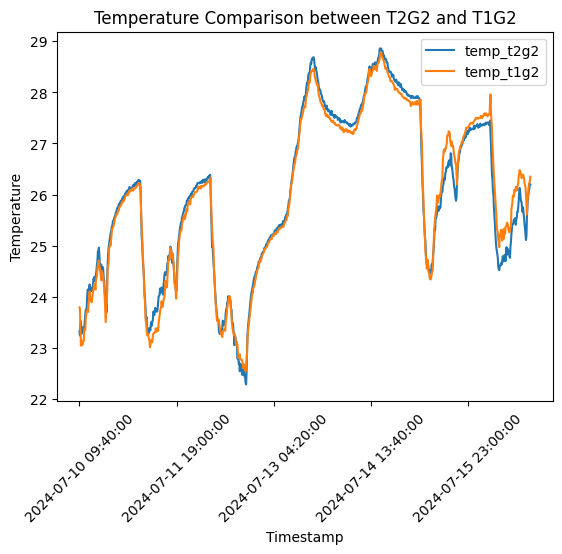

In [69]:
data[['temp_t2g2', 'temp_t1g2']].plot()
plt.xlabel('Timestamp')
plt.ylabel('Temperature')
plt.title('Temperature Comparison between T2G2 and T1G2')
plt.xticks(rotation=45)
plt.show()

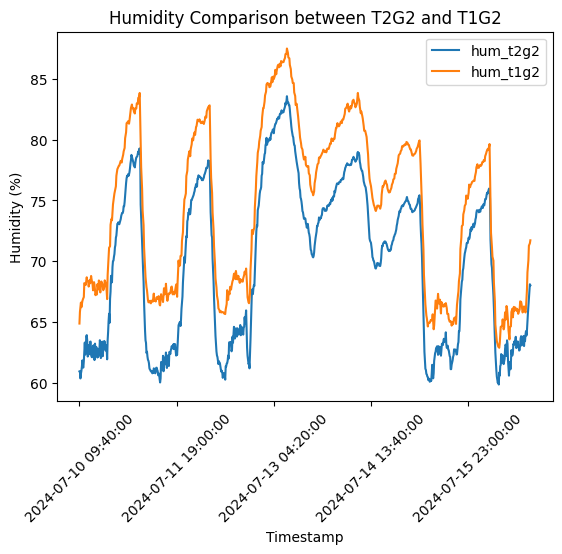

In [70]:
data[['hum_t2g2', 'hum_t1g2']].plot()
plt.xlabel('Timestamp')
plt.ylabel('Humidity (%)')
plt.title('Humidity Comparison between T2G2 and T1G2')
plt.xticks(rotation=45)
plt.show()

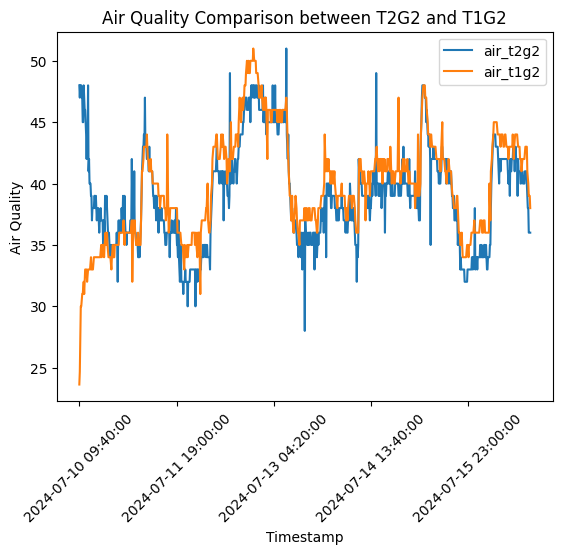

In [71]:
data[['air_t2g2', 'air_t1g2']].plot()
plt.xlabel('Timestamp')
plt.ylabel('Air Quality')
plt.title('Air Quality Comparison between T2G2 and T1G2')
plt.xticks(rotation=45)
plt.show()

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

def impute(input, target, label):
  X = input
  y = target

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  model = LinearRegression()
  model.fit(X_train.values.reshape(-1, 1), y_train)
  y_pred = model.predict(X_test.values.reshape(-1, 1))
  r2 = r2_score(y_test, y_pred)
  print(f"R-squared score for {label}: {r2}")

  if r2 > 0.9:
    time_frame = pd.date_range(start=t2g2.index[-1], end=t1g2.index[-1], freq='10T')
    t2g2_predicted = pd.DataFrame({'timestamp': time_frame, 'temp_t2g2': model.predict(t1g2['temp'].loc[t2g2.index[-1]:].values.reshape(-1, 1))})
    t2g2_predicted.set_index('timestamp', inplace=True)
    return t2g2_predicted
  else:
    print(f"R-squared score is not high enough to impute for {label}.")
    return None

In [73]:
t2g2_imputed = pd.DataFrame()
t2g2_imputed['temp'] = impute(data['temp_t2g2'], data['temp_t1g2'], 'temperature')
t2g2_imputed['hum'] = impute(data['hum_t2g2'], data['hum_t1g2'], 'humidity')
t2g2_imputed['air'] = impute(data['air_t2g2'], data['air_t1g2'], 'air quality')
t2g2_imputed = t2g2_imputed.round(2)
t2g2_imputed =  t2g2_imputed.drop(t2g2.index[-1], axis=0)
t2g2_imputed.head()

R-squared score for temperature: 0.9795069860543498
R-squared score for humidity: 0.9862412534192517
R-squared score for air quality: 0.605261290640879
R-squared score is not high enough to impute for air quality.


,temp,hum,air
timestamp,,,
2024-07-16 20:30:00,26.34,30.71,None
2024-07-16 20:40:00,26.34,30.71,None
2024-07-16 20:50:00,26.34,30.71,None
2024-07-16 21:00:00,26.34,30.71,None
2024-07-16 21:10:00,26.34,30.71,None


In [74]:
# concat the predicted and original data
t2g2_imputed = pd.concat([t2g2, t2g2_imputed], axis=0)
t2g2_imputed.drop('air', axis=1, inplace=True)
t2g2_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3282 entries, 2024-07-01 14:50:00 to 2024-07-24 09:40:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    3282 non-null   float64
 1   hum     3282 non-null   float64
dtypes: float64(2)
memory usage: 76.9+ KB


<ipython-input-74-b0ab32be4b95>:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  t2g2_imputed = pd.concat([t2g2, t2g2_imputed], axis=0)


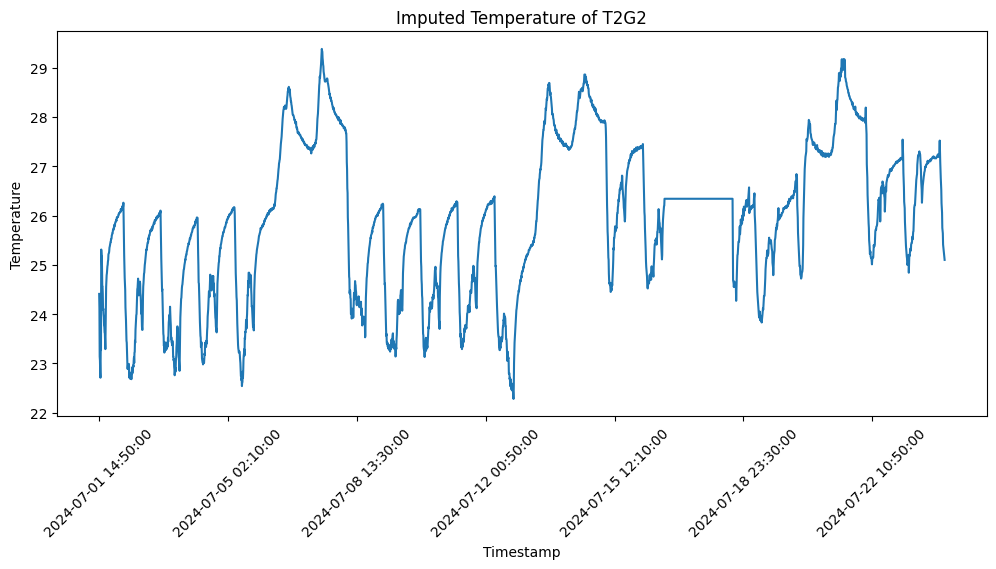

In [75]:
fig, ax = plt.subplots(figsize=(12, 5))
t2g2_imputed['temp'].plot(ax=ax, label='T2G2')
plt.xlabel('Timestamp')
plt.ylabel('Temperature')
plt.title('Imputed Temperature of T2G2')
plt.xticks(rotation=45)
plt.show()

# Export

In [142]:
# processed data
data.reset_index().to_csv('t2g2_main.csv', index=False)
t2g3.reset_index().to_csv('t2g3.csv', index=False)
t1g2.reset_index().to_csv('t1g2.csv', index=False)
amk_main.reset_index().to_csv('amk.csv', index=False)
t2g5.reset_index().to_csv('t2g5.csv', index=False)
device.reset_index().to_csv('device01.csv', index=False)
t2g2_imputed.reset_index().to_csv('t2g2_imputed.csv', index=False)

# download (optional)
# from google.colab import files
# files.download('t2g2_main.csv')
# files.download('t2g3.csv')
# files.download('t1g2.csv')
# files.download('amk.csv')
# files.download('t2g5.csv')
# files.download('device01.csv')
# files.download('t2g2_imputed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Analysis

## Our original data

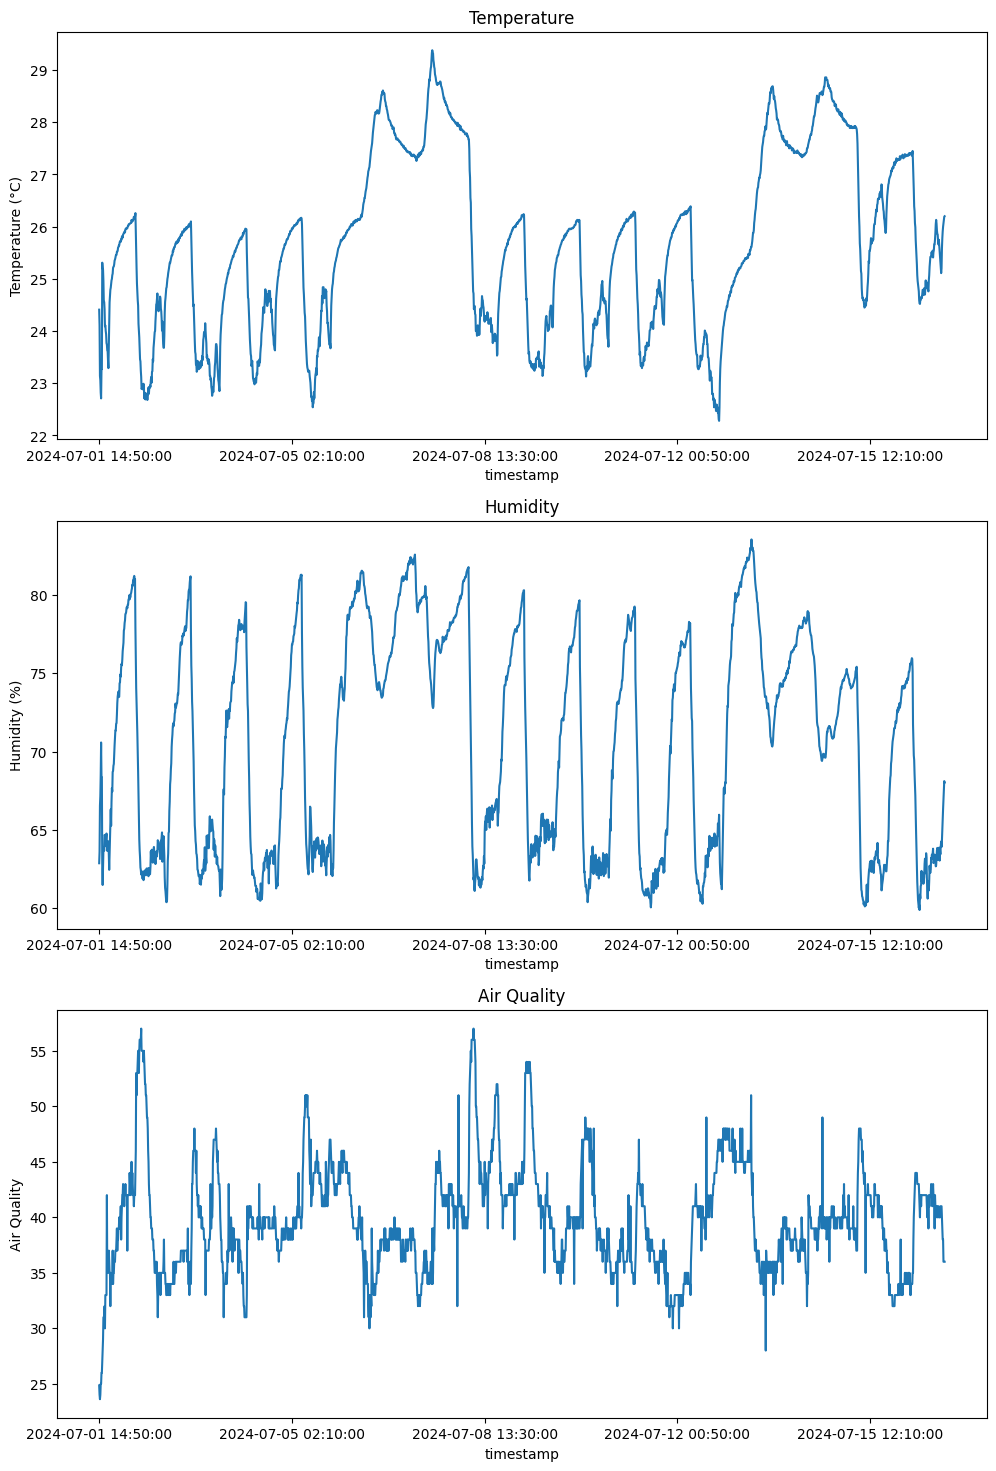

In [76]:
# plotting overall t2g2 data
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(12, 18), nrows=3)
ax1 = t2g2['temp'].plot(ax=ax1, title='Temperature')
ax1.set_ylabel('Temperature (°C)')
ax2 = t2g2['hum'].plot(ax=ax2, title='Humidity')
ax2.set_ylabel('Humidity (%)')
ax3 = t2g2['air'].plot(ax=ax3, title='Air Quality')
ax3.set_ylabel('Air Quality')
plt.show()

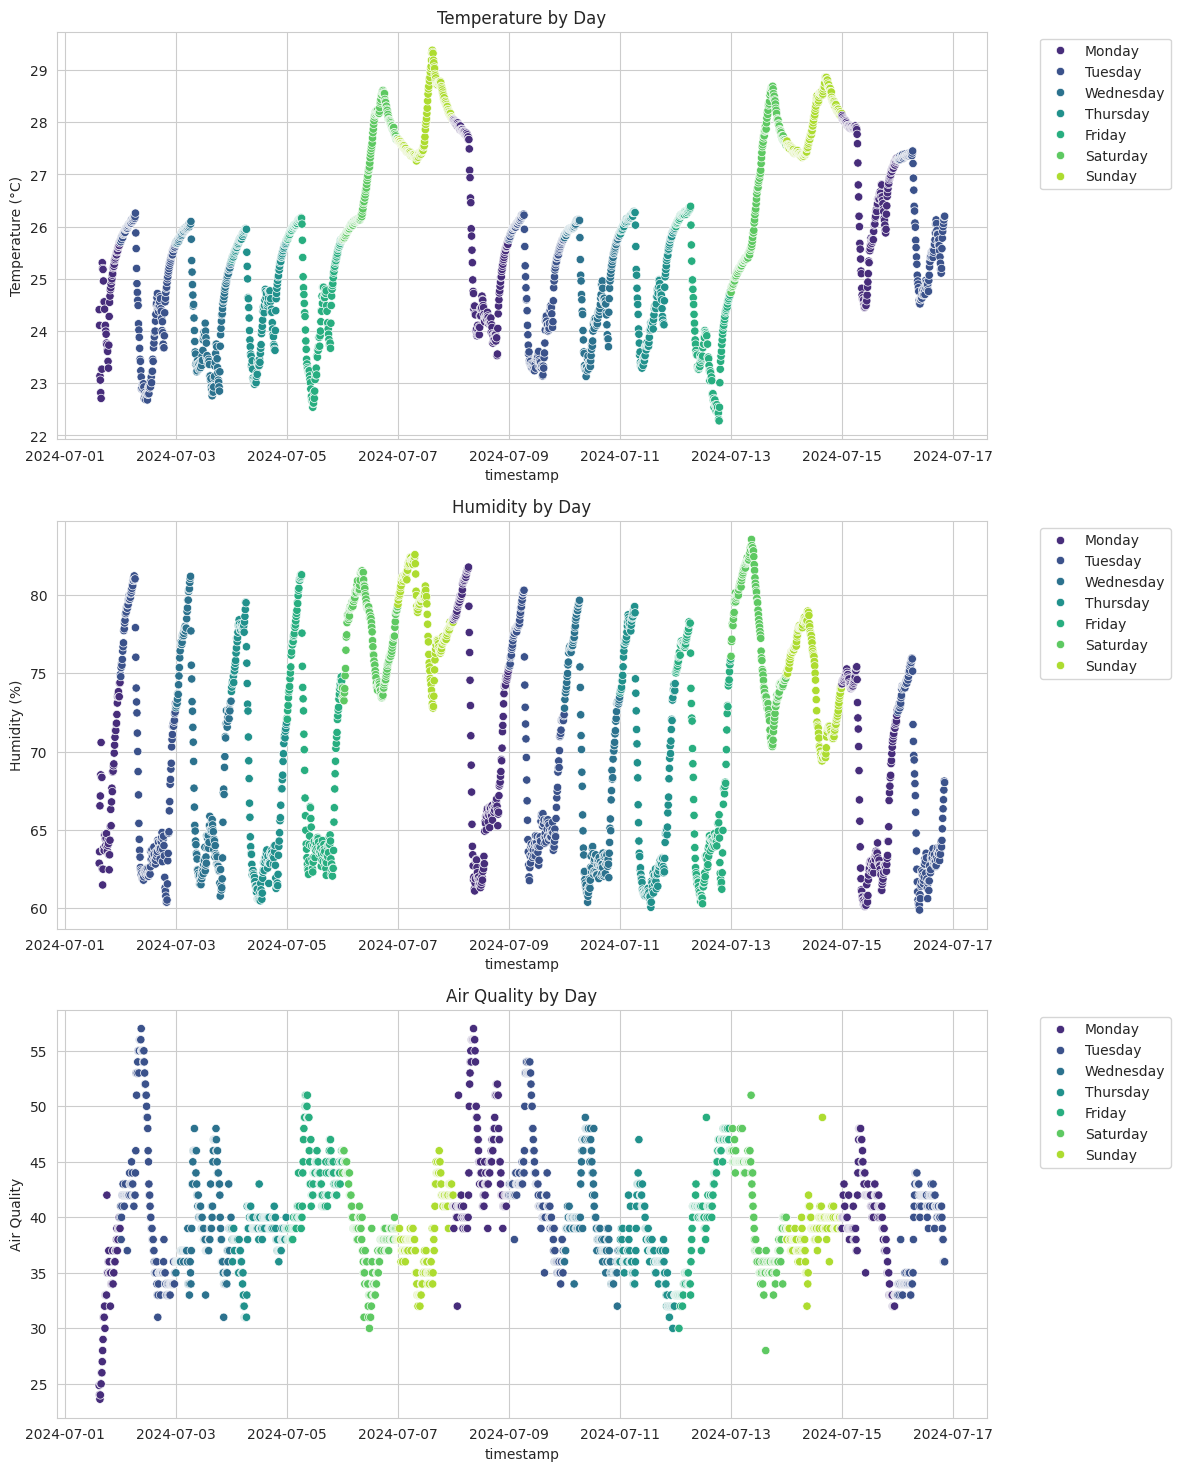

In [77]:
# plotting days of the week data
t2g2.index = pd.to_datetime(t2g2.index)
t2g2['day'] = t2g2.index.day_name()

sns.set_style('whitegrid')

fig, (ax1, ax2, ax3) = plt.subplots(figsize=(12, 18), nrows=3)

sns.scatterplot(data=t2g2, x='timestamp', y='temp', ax=ax1, hue='day', palette='viridis')
ax1.set_ylabel('Temperature (°C)')
ax1.set_title('Temperature by Day')
ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.5)

sns.scatterplot(data=t2g2, x='timestamp', y='hum', ax=ax2, hue='day', palette='viridis')
ax2.set_ylabel('Humidity (%)')
ax2.set_title('Humidity by Day')
ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.5)

sns.scatterplot(data=t2g2, x='timestamp', y='air', ax=ax3, hue='day', palette='viridis')
ax3.set_ylabel('Air Quality')
ax3.set_title('Air Quality by Day')
ax3.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.5)

plt.show()

In [78]:
# plotting daily average

t2g2_weekly = t2g2.drop('day', axis=1).resample('D').mean().round(2)
t2g2_weekly['day'] = t2g2_weekly.index.day_name()
t2g2_weekly.head()

,temp,hum,air,day
timestamp,,,,
2024-07-01,24.63,67.42,33.54,Monday
2024-07-02,24.64,68.72,41.33,Tuesday
2024-07-03,24.44,68.81,39.11,Wednesday
2024-07-04,24.72,67.83,38.18,Thursday
2024-07-05,24.73,69.14,43.00,Friday


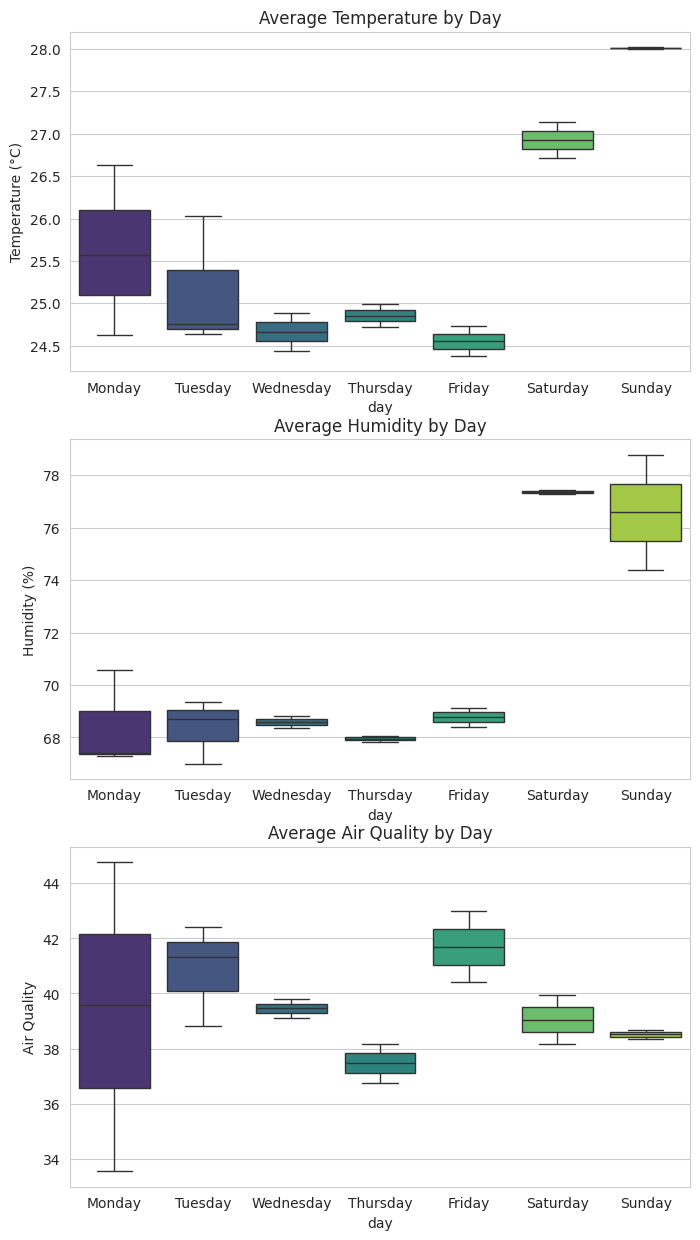

In [79]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(8, 15), nrows=3)

sns.boxplot(data=t2g2_weekly, x='day', y='temp', ax=ax1, hue='day', palette='viridis')
ax1.set_ylabel('Temperature (°C)')
ax1.set_title('Average Temperature by Day')

sns.boxplot(data=t2g2_weekly, x='day', y='hum', ax=ax2, hue='day', palette='viridis')
ax2.set_ylabel('Humidity (%)')
ax2.set_title('Average Humidity by Day')

sns.boxplot(data=t2g2_weekly, x='day', y='air', ax=ax3, hue='day', palette='viridis')
ax3.set_ylabel('Air Quality')
ax3.set_title('Average Air Quality by Day')

plt.show()

## T2G2 vs Device01

In [80]:
# get data for matching timestamp
t2g2_device01 = pd.concat([t2g2.add_suffix('_t2g2'), device.add_suffix('_device01')], axis=1, join='inner')
t2g2_device01.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1067 entries, 2024-07-09 10:40:00 to 2024-07-16 20:20:00
Freq: 10T
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temp_t2g2            1067 non-null   float64
 1   hum_t2g2             1067 non-null   float64
 2   air_t2g2             1067 non-null   float64
 3   day_t2g2             1067 non-null   object 
 4   brightness_device01  1067 non-null   float64
 5   air_temp_device01    1067 non-null   float64
 6   sur_temp_device01    1067 non-null   float64
dtypes: float64(6), object(1)
memory usage: 66.7+ KB


In [81]:
# July 9 to July 16, which is one week
# let us use the imputed data to compare over longer period
t2g2_device01 = pd.concat([t2g2_imputed.add_suffix('_t2g2'), device.add_suffix('_device01')], axis=1, join='inner')
t2g2_device01.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1088 entries, 2024-07-16 20:30:00 to 2024-07-24 09:40:00
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temp_t2g2            1088 non-null   float64
 1   hum_t2g2             1088 non-null   float64
 2   brightness_device01  1088 non-null   float64
 3   air_temp_device01    1088 non-null   float64
 4   sur_temp_device01    1088 non-null   float64
dtypes: float64(5)
memory usage: 51.0+ KB


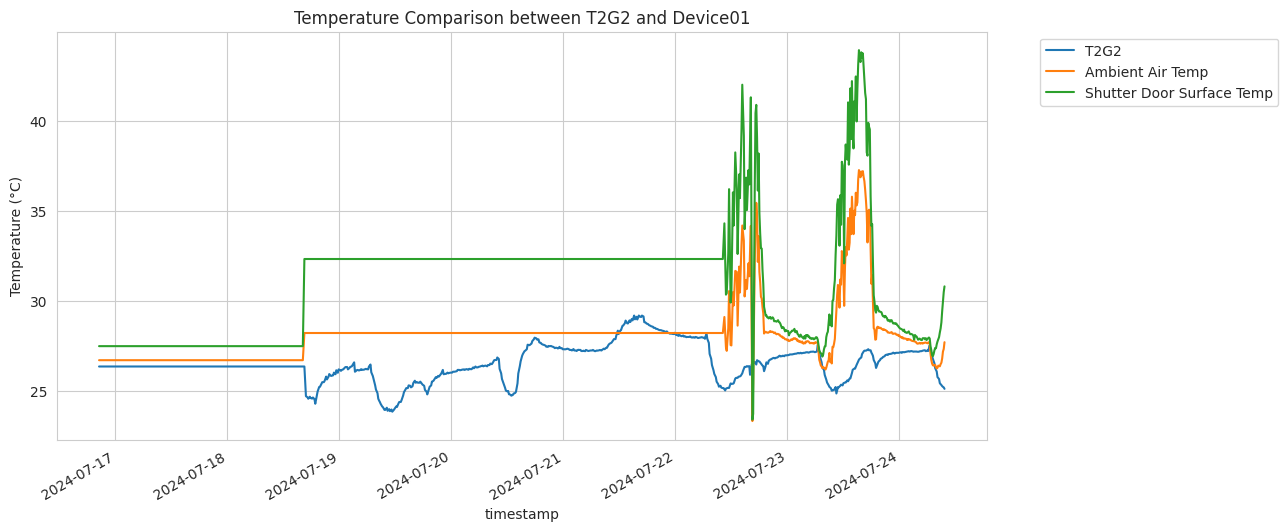

In [82]:
# general comparison

fig, ax = plt.subplots(figsize=(12, 6))
t2g2_device01['temp_t2g2'].plot(ax=ax, label='T2G2')
t2g2_device01['air_temp_device01'].plot(ax=ax, label='Ambient Air Temp')
t2g2_device01['sur_temp_device01'].plot(ax=ax, label='Shutter Door Surface Temp')
ax.set_ylabel('Temperature (°C)')
ax.set_title('Temperature Comparison between T2G2 and Device01')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.5)
plt.show()

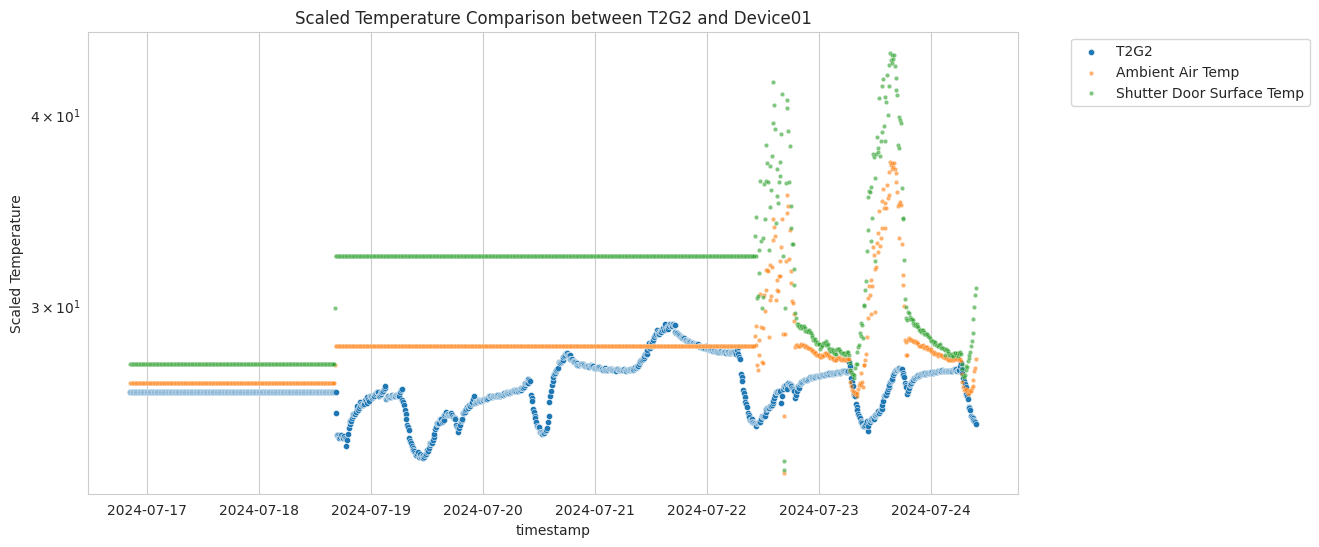

In [83]:
# the temp near the shutter door and of the shutter door is quite high compared to device01
# but they also seem to have a pattern

# plot scaled data to see relative change
fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(data=t2g2_device01, x='timestamp', y='temp_t2g2', ax=ax, label='T2G2', s=20)
sns.scatterplot(data=t2g2_device01, x='timestamp', y='air_temp_device01', ax=ax, label='Ambient Air Temp', alpha=0.6, s=10)
ax = sns.scatterplot(data=t2g2_device01, x='timestamp', y='sur_temp_device01', ax=ax, label='Shutter Door Surface Temp', alpha=0.6, s=10)
ax.set_yscale('log')
ax.set_ylabel('Scaled Temperature')
ax.set_title('Scaled Temperature Comparison between T2G2 and Device01')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.5)
plt.show()

In [84]:
# not good enough; let us use the original data and some statistics

org = pd.concat([t2g2.add_suffix('_t2g2'), device.add_suffix('_device01')], axis=1, join='inner')
org.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1067 entries, 2024-07-09 10:40:00 to 2024-07-16 20:20:00
Freq: 10T
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temp_t2g2            1067 non-null   float64
 1   hum_t2g2             1067 non-null   float64
 2   air_t2g2             1067 non-null   float64
 3   day_t2g2             1067 non-null   object 
 4   brightness_device01  1067 non-null   float64
 5   air_temp_device01    1067 non-null   float64
 6   sur_temp_device01    1067 non-null   float64
dtypes: float64(6), object(1)
memory usage: 66.7+ KB


In [85]:
org.drop('day_t2g2', axis=1, inplace=True)
org.head()

,temp_t2g2,hum_t2g2,air_t2g2,brightness_device01,air_temp_device01,sur_temp_device01
timestamp,,,,,,
2024-07-09 10:40:00,23.36,63.34,46.0,72.0,26.51,29.61
2024-07-09 10:50:00,23.30,64.06,46.0,72.0,26.45,29.13
2024-07-09 11:00:00,23.24,64.00,45.0,60.0,26.50,29.18
2024-07-09 11:10:00,23.34,64.13,44.0,48.0,26.55,29.23
2024-07-09 11:20:00,23.37,63.33,44.0,55.0,26.71,29.77


In [86]:
# scale based on initial value
org = org.div(org.iloc[0]).mul(100).round(2)
org.head()

,temp_t2g2,hum_t2g2,air_t2g2,brightness_device01,air_temp_device01,sur_temp_device01
timestamp,,,,,,
2024-07-09 10:40:00,100.00,100.00,100.00,100.00,100.00,100.00
2024-07-09 10:50:00,99.74,101.14,100.00,100.00,99.77,98.38
2024-07-09 11:00:00,99.49,101.04,97.83,83.33,99.96,98.55
2024-07-09 11:10:00,99.91,101.25,95.65,66.67,100.15,98.72
2024-07-09 11:20:00,100.04,99.98,95.65,76.39,100.75,100.54


In [87]:
# check for cointegration

# check for stationary
from statsmodels.tsa.stattools import adfuller

for para in org.columns:
    result = adfuller(org[para].dropna())
    print(f'ADF Statistic for {para}: {result[0]}')
    print(f'p-value for {para}: {result[1]}')
    if result[1] <= 0.05:
        print(f'{para} is stationary.\n')
    else:
        print(f'{para} is not stationary.\n')

ADF Statistic for temp_t2g2: -2.6830694993051982
p-value for temp_t2g2: 0.07701408517785602
temp_t2g2 is not stationary.

ADF Statistic for hum_t2g2: -3.9852782458892473
p-value for hum_t2g2: 0.0014895911194339998
hum_t2g2 is stationary.

ADF Statistic for air_t2g2: -3.7142529964853317
p-value for air_t2g2: 0.003917081502776724
air_t2g2 is stationary.

ADF Statistic for brightness_device01: -4.510024445155186
p-value for brightness_device01: 0.00018859925953226966
brightness_device01 is stationary.

ADF Statistic for air_temp_device01: -4.139531569998387
p-value for air_temp_device01: 0.0008326339784095304
air_temp_device01 is stationary.

ADF Statistic for sur_temp_device01: -3.685062066706438
p-value for sur_temp_device01: 0.00432824378428832
sur_temp_device01 is stationary.



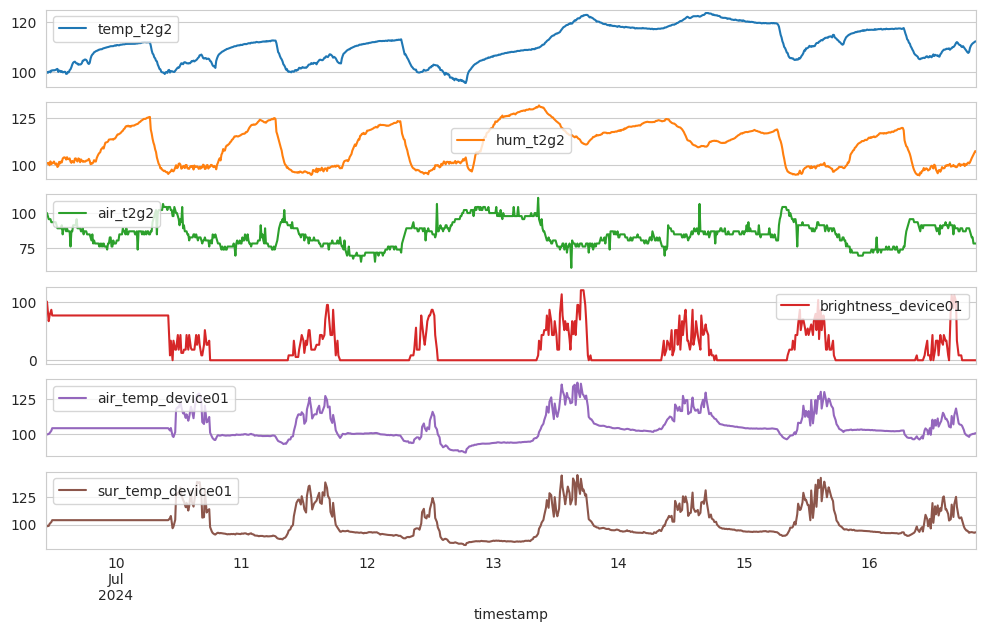

In [88]:
# cointegration is not possible as device01 data is stationary

# visualization of stationary
org.plot(subplots=True, figsize=(12, 7))

plt.show()

## T2G2 vs T2G5

In [89]:
t2g5.index = pd.to_datetime(t2g5.index)
t2g2_t2g5 = pd.concat([t2g2.add_suffix('_t2g2'), t2g5.add_suffix('_t2g5')], axis=1, join='inner')
t2g2_t2g5.head()

,temp_t2g2,hum_t2g2,air_t2g2,day_t2g2,temp_t2g5,hum_t2g5,air_t2g5
timestamp,,,,,,,
2024-07-08 16:30:00,24.12,65.89,45.0,Monday,32.51,67.12,17.0
2024-07-08 16:40:00,24.07,66.55,47.0,Monday,31.82,67.43,17.0
2024-07-08 16:50:00,23.95,65.62,46.0,Monday,30.11,66.79,17.0
2024-07-08 17:00:00,23.77,66.36,46.0,Monday,28.40,66.15,17.0
2024-07-08 17:10:00,23.91,66.19,47.0,Monday,28.06,64.89,19.0


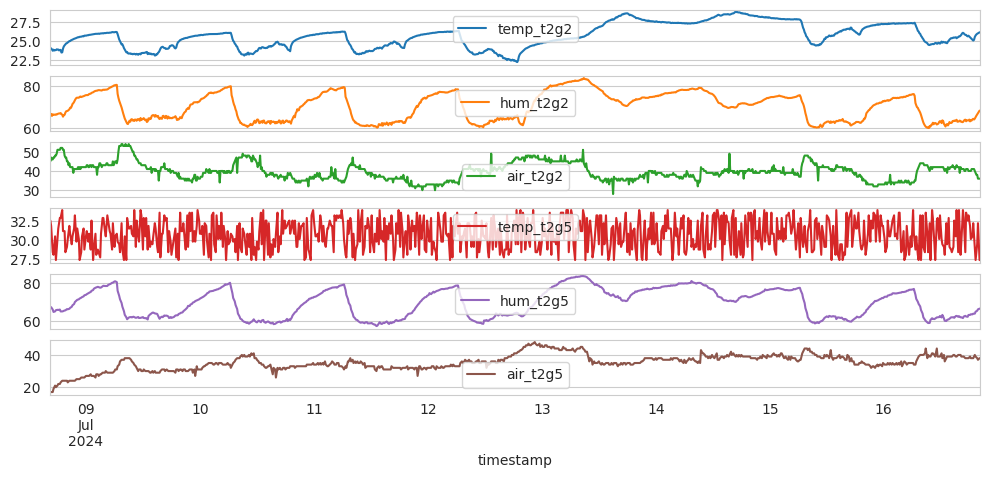

In [90]:
# general comparison
t2g2_t2g5.plot(subplots=True, figsize=(12, 5))
plt.show()

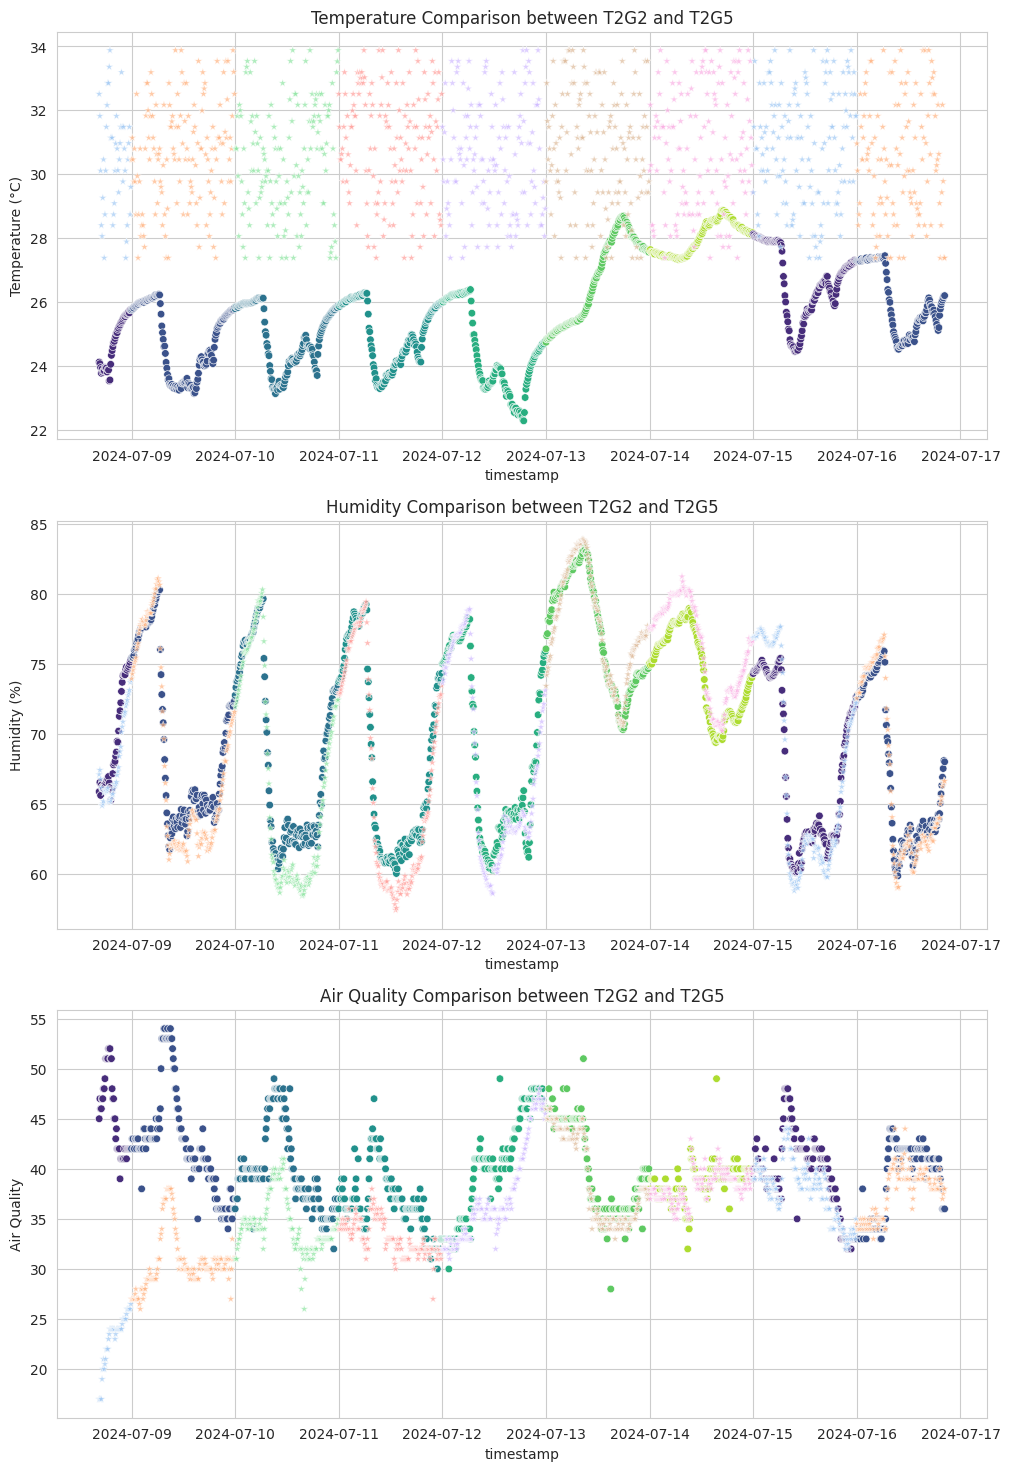

In [91]:
# looks comparable

fig, (ax1, ax2, ax3) = plt.subplots(figsize=(12, 18), nrows=3)

sns.scatterplot(data=t2g2_t2g5, x='timestamp', y='temp_t2g2', ax=ax1, s=30, hue='day_t2g2', palette='viridis', legend=False)
sns.scatterplot(data=t2g2_t2g5, x='timestamp', y='temp_t2g5', ax=ax1, s=35, alpha=0.7, hue='day_t2g2', palette='pastel', legend=False, marker='*')
ax1.set_ylabel('Temperature (°C)')
ax1.set_title('Temperature Comparison between T2G2 and T2G5')

sns.scatterplot(data=t2g2_t2g5, x='timestamp', y='hum_t2g2', ax=ax2, s=30, hue='day_t2g2', palette='viridis', legend=False)
sns.scatterplot(data=t2g2_t2g5, x='timestamp', y='hum_t2g5', ax=ax2, s=35, alpha=0.7, hue='day_t2g2', palette='pastel', legend=False, marker='*')
ax2.set_ylabel('Humidity (%)')
ax2.set_title('Humidity Comparison between T2G2 and T2G5')

sns.scatterplot(data=t2g2_t2g5, x='timestamp', y='air_t2g2', ax=ax3, s=30, hue='day_t2g2', palette='viridis', legend=False)
sns.scatterplot(data=t2g2_t2g5, x='timestamp', y='air_t2g5', ax=ax3, s=35, alpha=0.7, hue='day_t2g2', palette='pastel', legend=False, marker='*')
ax3.set_ylabel('Air Quality')
ax3.set_title('Air Quality Comparison between T2G2 and T2G5')

plt.show()


## T2G2 vs AMK Weather Data

In [131]:
# amk weather data is in hourly interval
amk_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 749 entries, 0 to 748
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    749 non-null    object 
 1   temp         745 non-null    float64
 2   hum          744 non-null    float64
 3   description  749 non-null    object 
dtypes: float64(2), object(2)
memory usage: 23.5+ KB


In [132]:
amk_main.set_index('timestamp', inplace=True)
amk_main.index = pd.to_datetime(amk_main.index)
amk_main.head()

,temp,hum,description
timestamp,,,
2024-07-01 00:00:00,26.0,89.0,Passing clouds.
2024-07-01 01:00:00,26.0,89.0,Passing clouds.
2024-07-01 02:00:00,26.0,89.0,Passing clouds.
2024-07-01 03:00:00,25.0,94.0,Passing clouds.
2024-07-01 04:00:00,25.0,89.0,Passing clouds.


In [133]:
# select only numeric columns for resampling
numeric_cols = amk_main.select_dtypes(include='number').columns

# resample numeric columns
resampled_numeric = amk_main[numeric_cols].resample('1H').mean()

resampled_numeric.head()
# select non-numeric columns
non_numeric_cols = amk_main.select_dtypes(exclude='number').columns

# take the first value for non-numeric columns in each resampled period
resampled_non_numeric = amk_main[non_numeric_cols].resample('1H').first()

# combine
amk = pd.concat([resampled_numeric, resampled_non_numeric], axis=1)

amk['description'].value_counts()

,count
description,
Passing clouds.,352
Partly sunny.,284
Broken clouds.,50
Partly cloudy.,17
Scattered showers. Partly sunny.,10
Light rain. Partly sunny.,6
Scattered clouds.,5
Sprinkles. Scattered clouds.,4
Scattered showers. Broken clouds.,3


In [136]:
# replace similar conditions for simplicity
amk['description'] = ['Heavy Rain' if 'thunder' in x.lower() else x for x in amk['description']]
amk['description'] = ['Light Rain' if 'light rain' in x.lower() else x for x in amk['description']]
amk['description'] = ['Light Rain' if 'shower' in x.lower() else x for x in amk['description']]
amk['description'] = ['Light Rain' if 'sprinkles' in x.lower() else x for x in amk['description']]
amk['description'] = ['Rain' if 'rain' in x.lower() and 'light' not in x.lower() and 'heavy' not in x.lower() else x for x in amk['description']]
amk['description'] = ['Cloudy' if 'cloud' in x.lower() else x for x in amk['description']]
amk['description'] = ['Sunny' if 'sun' in x.lower() else x for x in amk['description']]
amk['description'].value_counts()

,count
description,
Cloudy,424
Sunny,284
Light Rain,30
Heavy Rain,4
Rain,2


In [138]:
# resample our t2g2 to hourly frequency
t2g2 = t2g2.drop('day', axis=1).resample('1H').mean().round(2)
t2g2.head()

,temp,hum,air
timestamp,,,
2024-07-01 14:00:00,24.41,62.86,24.86
2024-07-01 15:00:00,23.18,67.46,24.61
2024-07-01 16:00:00,24.75,63.73,28.67
2024-07-01 17:00:00,24.19,64.31,32.00
2024-07-01 18:00:00,23.58,64.11,36.00


In [139]:
# combine
t2g2_amk = pd.concat([t2g2.add_suffix('_t2g2'), amk.add_suffix('_amk')], axis=1, join='inner').round(2)
t2g2_amk.head()

,temp_t2g2,hum_t2g2,air_t2g2,temp_amk,hum_amk,description_amk
timestamp,,,,,,
2024-07-01 14:00:00,24.41,62.86,24.86,33.0,70.0,Cloudy
2024-07-01 15:00:00,23.18,67.46,24.61,33.0,70.0,Sunny
2024-07-01 16:00:00,24.75,63.73,28.67,33.0,70.0,Sunny
2024-07-01 17:00:00,24.19,64.31,32.00,32.0,70.0,Sunny
2024-07-01 18:00:00,23.58,64.11,36.00,30.0,74.0,Sunny


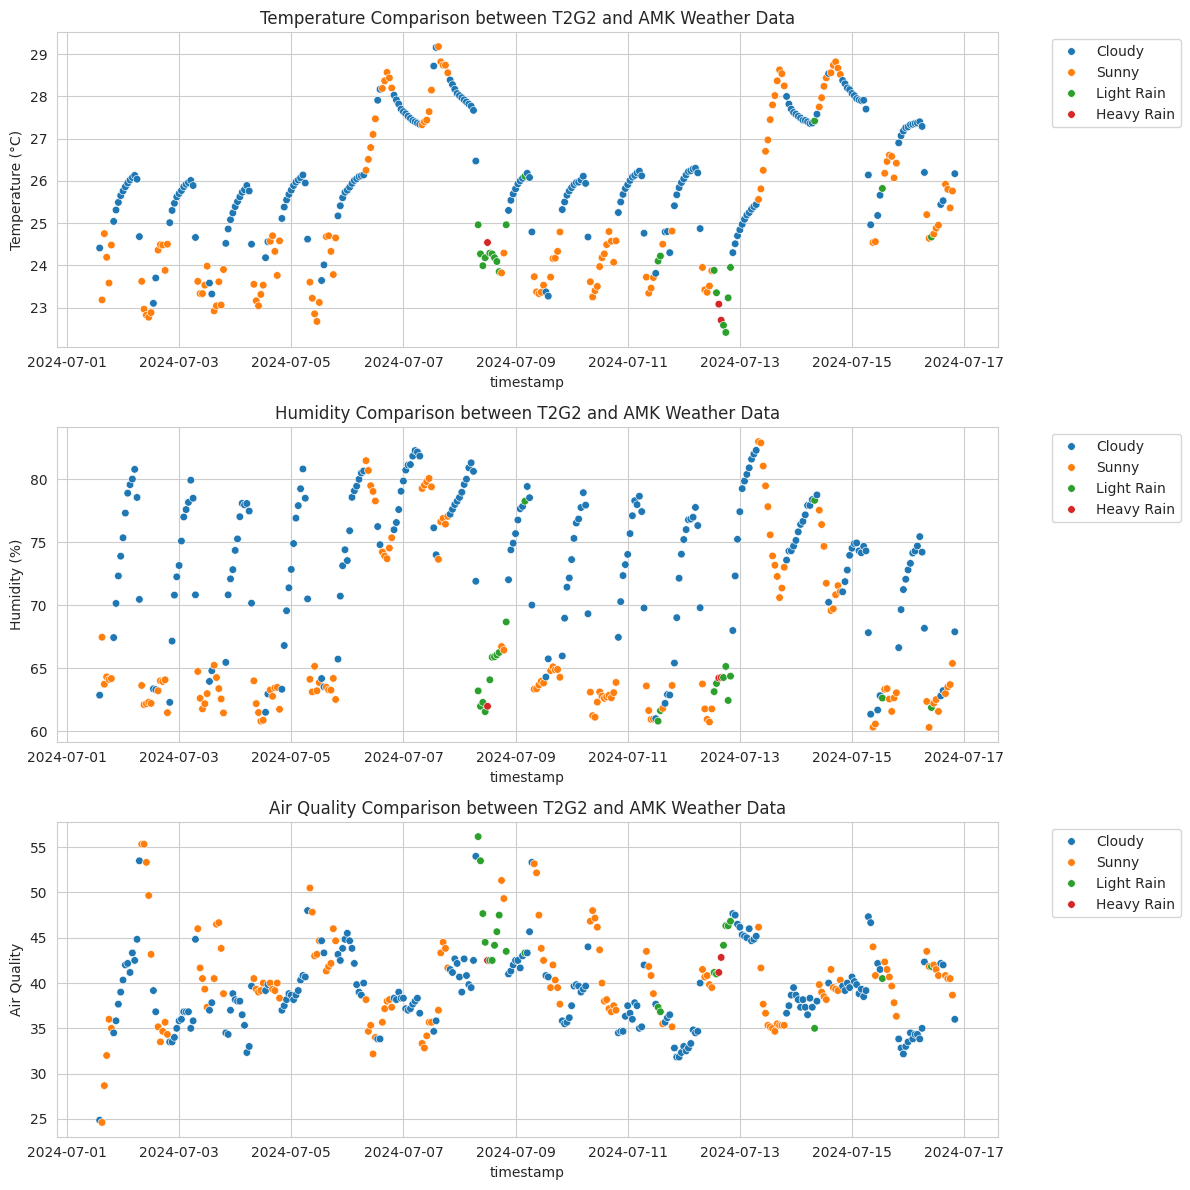

In [140]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(12, 12), nrows=3)

sns.scatterplot(data=t2g2_amk, x='timestamp', y='temp_t2g2', ax=ax1, s=30, hue='description_amk')
ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.5)
ax1.set_ylabel('Temperature (°C)')
ax1.set_title('Temperature Comparison between T2G2 and AMK Weather Data')

sns.scatterplot(data=t2g2_amk, x='timestamp', y='hum_t2g2', ax=ax2, s=30, hue='description_amk')
ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.5)
ax2.set_ylabel('Humidity (%)')
ax2.set_title('Humidity Comparison between T2G2 and AMK Weather Data')

sns.scatterplot(data=t2g2_amk, x='timestamp', y='air_t2g2', ax=ax3, s=30, hue='description_amk')
ax3.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.5)
ax3.set_ylabel('Air Quality')
ax3.set_title('Air Quality Comparison between T2G2 and AMK Weather Data')

plt.tight_layout()
plt.show()